In [ ]:
def check_similarity(community_dict, pruned_graph):
    """
    Check for similarity between iraph and genres
    """


In [5]:
# imports
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections, os
from sklearn import metrics
import pandas as pd

# variables

genres = ['house', 'pop', 'hip hop', 'rap', 'classical', 'rock', 'tech', 'indie', 'metal', 'edm', 'step', 'elec', 'jazz']

fast_greedy_file = 'cluster_fast_greedy_groups.csv'
infomap_file = 'cluster_infomap_groups.csv'
label_prop_file = 'cluster_label_prop_groups.csv'
louvain_file = 'na_spotify_project/scripts/r_analysis/cluster_louvain_groups.csv'
leading_eigen_file = 'cluster_leading_eigen_groups.csv'
walktrap_file = 'cluster_walktrap_groups.csv'

def parse_groups(filename):
    """
    Parse the groups file provided from igraph into a dictionary
    """
    groups_dict = dict()
    counter = 0
    with open(filename, 'r') as this_file:
        for line in this_file.readlines():
            if line.strip() == '"x"':
                counter += 1
            elif line.strip() != '':
                groups_dict[line.strip().split(',')[1].replace('"', '')] = counter
    return groups_dict


def read_pickle_graph():
    """
    Goes to data directory reads graph, returns it
    """
    pickle_file_path = "/".join(os.path.abspath(os.path.curdir).split('/')[:-2]) + "/git/DSProjectz/na_spotify_project/data/spotify_data.pickle"

    return nx.read_gpickle(pickle_file_path)

def prune_network(graph_object, min_degree = 1):
    """
    Given graph prunes nodes with less than given degree
    """
    nodes_to_prune = set()
    for node in graph_object.nodes(data = True):
        this_node_genre = ''
        current_genre_dict = dict()
        try:
            if (graph_object.degree(node[0]) <= min_degree) or len(node[1]['genres']) == 0:
                nodes_to_prune.add(node[0])
            else:
                for genre_in_node in node[1]['genres']:
                    for chosen_genre in genres:
                        if chosen_genre in genre_in_node:
                            current_genre_dict[chosen_genre] = current_genre_dict.get(chosen_genre, 0) + 1
                sorted_x = sorted(current_genre_dict.items(), key = lambda kv: kv[1])
                if len(sorted_x) > 0:
                    node[1]['genres'] = sorted_x[::-1][0][0]
                if len(current_genre_dict) == 0:
                    nodes_to_prune.add(node[0])
        except KeyError:
            nodes_to_prune.add(node[0])
    
    for node in nodes_to_prune:
        graph_object.remove_node(node)

    # additionally remove all nodes that have zero degree after this pruning
    zero_deg_nodes = []
    for node in graph_object.nodes():
        if graph_object.degree(node) == 0:
            zero_deg_nodes.append(node)

    for node in zero_deg_nodes:
        graph_object.remove_node(node)

    return graph_object

plt.style.use("ggplot")
sp_graph = read_pickle_graph()
pruned_graph = prune_network(sp_graph)
print(len(pruned_graph.nodes()))
this_groups_dict = parse_groups(louvain_file)


8261


In [8]:
group_list = []
genre_list = []
pop_list = []
for node in pruned_graph.nodes(data = True):
    if node[0].split(':')[2] in this_groups_dict:
        genre_list.append(node[1]['genres'])
        group_list.append(this_groups_dict[node[0].split(':')[2]])
        pop_list.append(node[1]['popularity'])
   # print(f"group list: {len(group_list)}")
   # print(f"genre list: {len(genre_list)}")
   # print(f"popularity list: {len(pop_list)}")

group_array = np.array(group_list)
genre_array = np.array(genre_list)
pop_array = np.array(pop_list)

pop_df = pd.DataFrame(data = {'popularity' :pop_array, 'group': group_array, 'genre': genre_array})
print(pop_df)


    #print(metrics.normalized_mutual_info_score(np.array(group_list), np.array(genre_list)))

    # check for genre distribution
#    for group_id in collections.Counter(group_list).keys():
#        current_list = []
#        for idx,current_id in enumerate(group_list):
#            if group_id == current_id:
#                current_list.append(genre_list[idx])
       # print(collections.Counter(current_list))

popularity  group    genre
0             69      2      pop
1             67      2      pop
2             73     17      pop
3             71     17      pop
4             90      4     rock
...          ...    ...      ...
8255          28     21  hip hop
8256          56     21      pop
8257          38     21  hip hop
8258          32     21      pop
8259           2     17     tech

[8260 rows x 3 columns]


In [9]:
pop_df

,popularity,group,genre
0,69,2,pop
1,67,2,pop
2,73,17,pop
3,71,17,pop
4,90,4,rock
...,...,...,...
8255,28,21,hip hop
8256,56,21,pop
8257,38,21,hip hop
8258,32,21,pop


In [11]:
import seaborn as sns

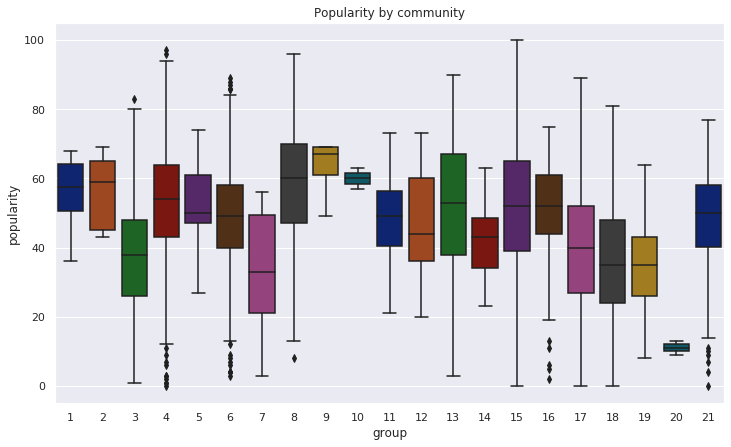

In [35]:
sns.set(rc= {'figure.figsize':(12,7)})
g = sns.boxplot(y = 'popularity', x = 'group', data = pop_df, palette = 'dark')
g.set_title('Popularity by community')
g.figure.savefig('pop_per_group.png')

In [15]:
pop_df[pop_df['group'] == 7]

,popularity,group,genre
934,33,7,hip hop
2687,17,7,rock
3592,48,7,hip hop
4998,3,7,house
5528,25,7,rap
5529,51,7,hip hop
5530,56,7,hip hop


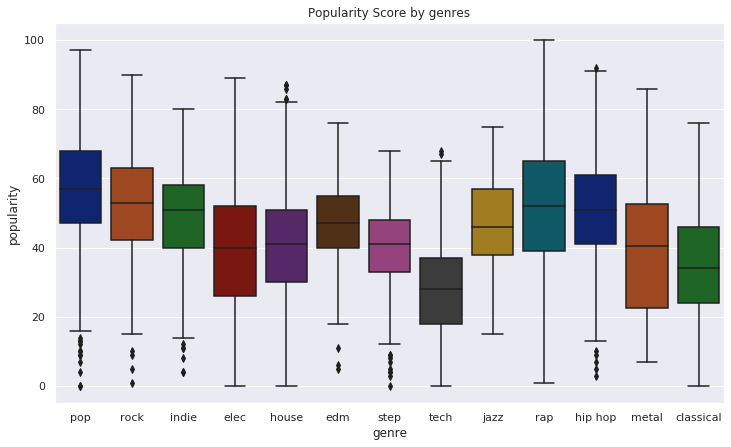

In [34]:
g = sns.boxplot(y = 'popularity', x = 'genre', data = pop_df, palette = 'dark')
g.set_title('Popularity Score by genres')
g.figure.savefig('pop_per_genre.png')

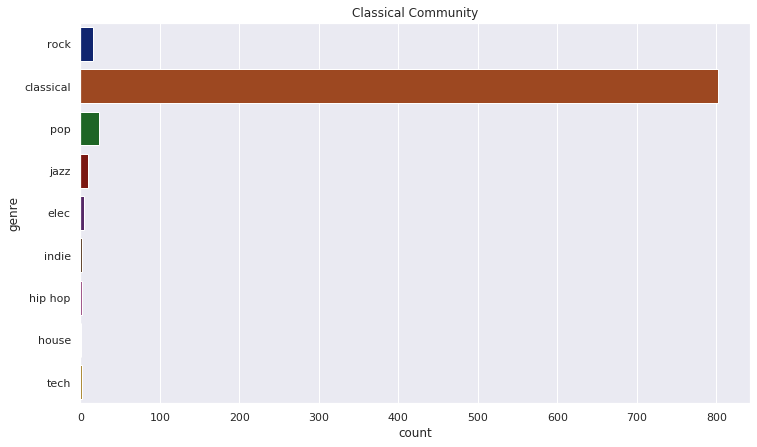

In [59]:
g = sns.countplot(y = 'genre', color = 'popularity', data = pop_df[pop_df['group'] == 18], palette = 'dark')
g.set_title('Classical Community')
g.figure.savefig('classical_comm.png')